<a href="https://colab.research.google.com/github/amitganon/Data-engineering/blob/main/%D7%94%D7%A0%D7%93%D7%A1%D7%AA_%D7%A0%D7%AA%D7%95%D7%A0%D7%99%D7%9D_%D7%AA%D7%A8%D7%92%D7%99%D7%9C_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## upload

In [ ]:
import json
import os

# Installing the Kaggle package
!pip install kaggle 

!mkdir /root/.kaggle/ 

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token ={"username":"amitganon","key":"3d37cfbaf99868ba7700ca65f0bfa80d"}


# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!mkdir ./datasets
!mkdir ./datasets/the-marvel-universe-social-network

In [ ]:
# download the dataset from Kaggle and unzip it 
!kaggle datasets download -d csanhueza/the-marvel-universe-social-network

  0% 0.00/2.72M [00:00<?, ?B/s]
100% 2.72M/2.72M [00:00<00:00, 88.4MB/s]


In [ ]:
!unzip /content/the-marvel-universe-social-network.zip
!ls /content/datasets/the-marvel-universe-social-network

Archive:  /content/the-marvel-universe-social-network.zip
  inflating: edges.csv               
  inflating: hero-network.csv        
  inflating: nodes.csv               


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
edges= pd.read_csv('/content/edges.csv')
heroNet= pd.read_csv('/content/hero-network.csv')
nodes= pd.read_csv('/content/nodes.csv')

## Q1

In [ ]:
allHeroesWithFriend = pd.DataFrame({'hero': heroNet['hero1'].append(heroNet['hero2']), 'friend':heroNet['hero2'].append(heroNet['hero1']) }).drop_duplicates(['hero','friend'])
numberOfFriendsPerHero = allHeroesWithFriend.groupby(['hero'], as_index=False)['friend'].count()
df=edges.drop_duplicates(['hero'])[~edges['hero'].isin(numberOfFriendsPerHero['hero'])][['hero']]
df['friend']=0
df=numberOfFriendsPerHero.append(df)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


Text(0, 0.5, 'count friend')

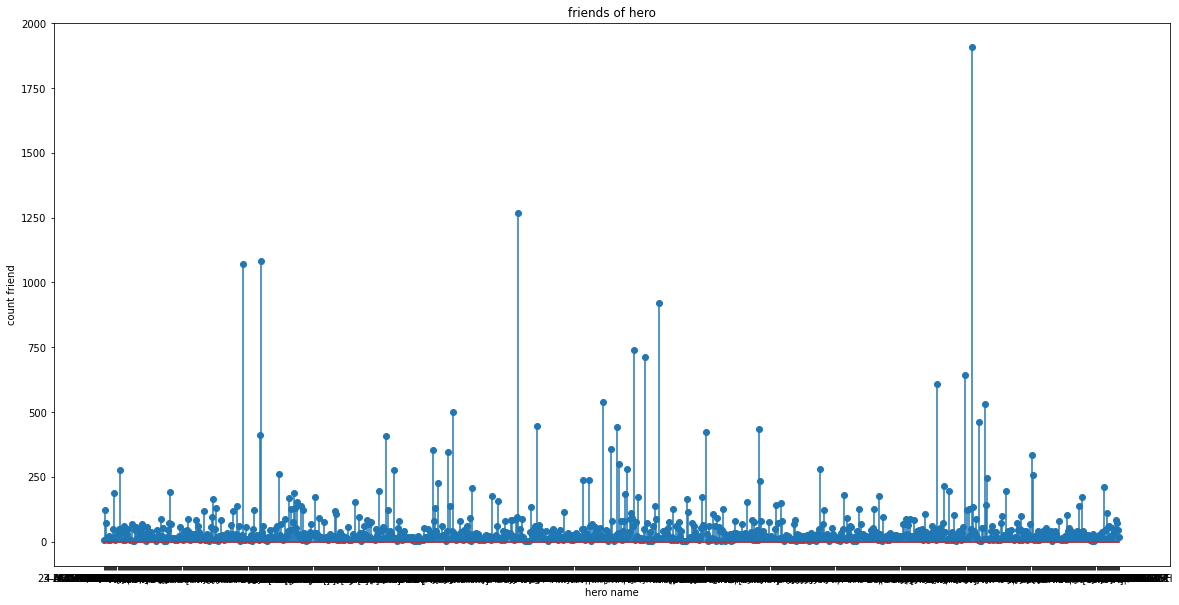

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
#df=df.sort_values(['friend'],ascending=False)
df=df.iloc[:1000]
x=list(df['hero'])
y=list(df['friend'])
fig=plt.figure(figsize=(20,10))
plt.stem(x,y)
plt.title("friends of hero")
plt.xlabel("hero name")
plt.ylabel("count friend")


## Q2

In [ ]:
df2=edges.drop_duplicates(['hero'])
df2['lenName']=df2['hero'].str.len()
df3=df2.groupby(df2['lenName'],as_index=False)['hero'].count()
df3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lenName,hero
0,1,5
1,2,6
2,3,53
3,4,224
4,5,366
5,6,450
6,7,381
7,8,321
8,9,270
9,10,306


In [ ]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 24.0)

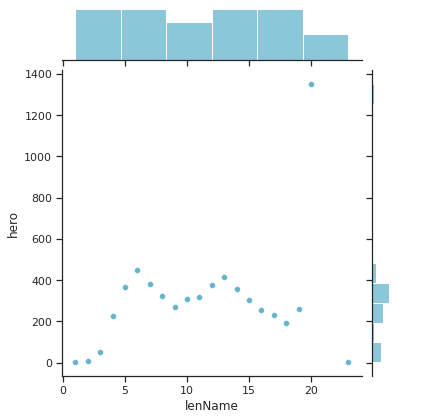

In [ ]:
sns.set_theme(style="ticks")
sns.jointplot(df3['lenName'],df3['hero'],color='c')
plt.xlim(0,24)


## רעידות אדמה

## upluad

In [ ]:
!kaggle datasets download -d usgs/earthquake-database
!unzip /content/earthquake-database.zip
!ls /content/edges.csv

  0% 0.00/590k [00:00<?, ?B/s]
100% 590k/590k [00:00<00:00, 38.7MB/s]
Archive:  /content/earthquake-database.zip
  inflating: database.csv            
/content/edges.csv


In [ ]:
earthquake = pd.read_csv("/content/database.csv")
!pip install plotly
import plotly.express as px
from datetime import datetime as dt

## Q1

In [ ]:
earthquake=earthquake.fillna('-')
from tqdm.notebook import tqdm
l = []
for quake in tqdm(range(len(earthquake))):
  l.append(earthquake["Date"][quake][-4:])
earthquake['year'] = l
df[['year', 'count']]=earthquake.groupby(earthquake['year'],as_index=False)['Date'].count()


In [ ]:
fig = px.scatter(df, x="year", y="count")
fig.show()

## Q2

In [ ]:
earthquake2=earthquake[earthquake['Magnitude']>8][['year','Magnitude']]
earthquake3=earthquake2.groupby(earthquake2['year'],as_index=False)['Magnitude'].count()
earthquake3[["year", "count"]] = earthquake3
earthquake3

,year,Magnitude,count
0,1965,2,2
1,1966,1,1
2,1968,1,1
3,1971,1,1
4,1989,1,1
5,1994,2,2
6,1996,1,1
7,1998,1,1
8,2001,1,1
9,2003,1,1


In [ ]:
fig = px.scatter(earthquake3, x="year", y="count")
fig.show()

## Q3

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



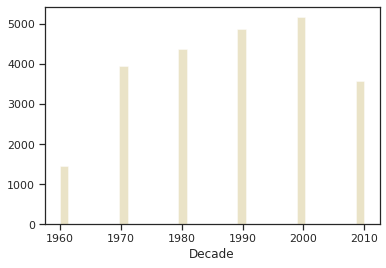

In [ ]:
earthquake2=earthquake[['Date']].copy()
earthquake2['Date']=pd.to_datetime(earthquake2['Date'],errors='coerce',utc=True)
earthquake2['Date'] =earthquake2['Date'].astype('datetime64[ns]')
earthquake2['Date']=earthquake2['Date'].dt.year
earthquake2=earthquake2.assign(Decade= lambda x: (x['Date']//10)*10)
g=earthquake2.groupby('Decade', as_index=False).count()
sns.distplot(earthquake2['Decade'],rug=False,color='y',kde=False)

## Q4

In [ ]:
earthquake3=earthquake[['Date']].copy()
earthquake3['Date']=pd.to_datetime(earthquake3['Date'],errors='coerce',utc=True)
earthquake3['Date'] =earthquake3['Date'].astype('datetime64[ns]')
earthquake3['Date']=earthquake3['Date'].dt.weekday
g=earthquake3.groupby('Date', as_index=False)['Date'].count()
g

,Date
0,3349
1,3244
2,3431
3,3306
4,3362
5,3433
6,3287
